In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
nltk.download([
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "vader_lexicon",
 ])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18622\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\18622\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\18622\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\18622\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\18622\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
#enter the csv file of the comment to analyze
df = pd.read_csv("test_hot_posts_01_03_comment.csv")
df.drop(index=df.index[0], axis=0, inplace=True)
# df = df_old.iloc[1:]
df.head()

,Unnamed: 0,comment
1,1,Could also be the peeking polar bear
2,2,Source: I need my puts to print
3,3,New lows coming…
4,4,Looks like there was an inverse batman right b...
5,5,"I believe this guy, he is into something"


In [6]:
doc = df.loc[1, "comment"]
print(doc)

Could also be the peeking polar bear


In [7]:
print(type(doc))

<class 'str'>


In [8]:
# case normalization 
doc = doc.lower()
print(doc)

could also be the peeking polar bear


In [9]:
# tokenization 
tokens = nltk.word_tokenize(doc)
print(tokens)

['could', 'also', 'be', 'the', 'peeking', 'polar', 'bear']


In [10]:
# non-word token removal 
tokens2 = [token for token in tokens if token.isalpha()]
print(tokens2)

['could', 'also', 'be', 'the', 'peeking', 'polar', 'bear']


In [11]:
# stopwords removal 
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
tokens3 = [token for token in tokens2 if token not in stopwords]
print(tokens3)

['could', 'also', 'peeking', 'polar', 'bear']


In [13]:
# word stemming 
porter = nltk.PorterStemmer()

tokens4 = [porter.stem(token) for token in tokens3]
print(tokens4)

['could', 'also', 'peek', 'polar', 'bear']


In [14]:
df.head()

,Unnamed: 0,comment
1,1,Could also be the peeking polar bear
2,2,Source: I need my puts to print
3,3,New lows coming…
4,4,Looks like there was an inverse batman right b...
5,5,"I believe this guy, he is into something"


In [15]:
# write a function to process one column of the dataframe
def get_tokens(doc):
    
    # case normalization 
    doc = doc.lower()
    
    # tokenization 
    tokens = nltk.word_tokenize(doc)
    
    # non-word token removal 
    tokens2 = [token for token in tokens if token.isalpha()]

    # stopwords removal 
    stopwords = nltk.corpus.stopwords.words("english")
    tokens3 = [token for token in tokens2 if token not in stopwords]
    
    # word stemming 
    porter = nltk.PorterStemmer()
    tokens4 = [porter.stem(token) for token in tokens3]
    
    return tokens4

In [16]:
# apply the get_tokens function to the text columns - "Summary", "Text" 
df['comment_tokens'] = df["comment"].apply(get_tokens)

In [17]:
df.head()

,Unnamed: 0,comment,comment_tokens
1,1,Could also be the peeking polar bear,"[could, also, peek, polar, bear]"
2,2,Source: I need my puts to print,"[sourc, need, put, print]"
3,3,New lows coming…,"[new, low]"
4,4,Looks like there was an inverse batman right b...,"[look, like, invers, batman, right]"
5,5,"I believe this guy, he is into something","[believ, guy, someth]"


In [18]:
# generate a list that contains all the tokens of entire corpus
all_comment_tokens = []

for lst in df["comment_tokens"].tolist():
    all_comment_tokens += lst

In [19]:
print(all_comment_tokens[:100])

['could', 'also', 'peek', 'polar', 'bear', 'sourc', 'need', 'put', 'print', 'new', 'low', 'look', 'like', 'invers', 'batman', 'right', 'believ', 'guy', 'someth', 'add', 'open', 'mouth', 'got', 'pikachu', 'face', 'instead', 'spi', 'eyo', 'stock', 'market', 'robin', 'great', 'dd', 'op', 'badman', 'catigrl', 'uwu', 'put', 'final', 'ta', 'get', 'behind', 'wait', 'call', 'doubl', 'top', 'ana', 'classi', 'batman', 'strong', 'sell', 'signal', 'good', 'dd', 'get', 'around', 'batman', 'encount', 'bane', 'seriou', 'action', 'catwoman', 'alway', 'take', 'financi', 'advis', 'someon', 'call', 'bro', 'dd', 'come', 'put', 'put', 'put', 'spread', 'wayn', 'enterpris', 'invest', 'opportun', 'sourc', 'http', 'simplexoctatrad', 'know', 'jaspreet', 'sigh', 'trade', 'platform', 'tri', 'get', 'ytd', 'number', 'look', 'gooder', 'call', 'till', 'christma', 'put', 'till', 'april', 'much']


In [20]:
# generate a frequency dictionary for all the tokens 
freq_comment = nltk.FreqDist(all_comment_tokens)

#sort the frequency list in descending order
sorted_freq_comment = sorted(freq_comment.items(),key = lambda k:k[1], reverse = True)

sorted_freq_comment
freq_comment

FreqDist({'put': 12, 'batman': 9, 'cat': 9, 'bro': 7, 'like': 6, 'get': 6, 'call': 6, 'go': 6, 'look': 5, 'spi': 5, ...})

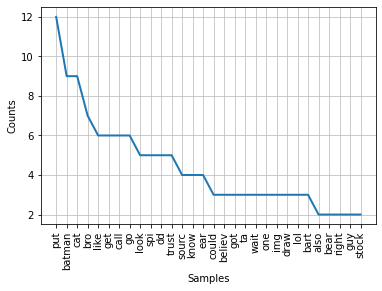

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
freq_comment.plot(30)

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

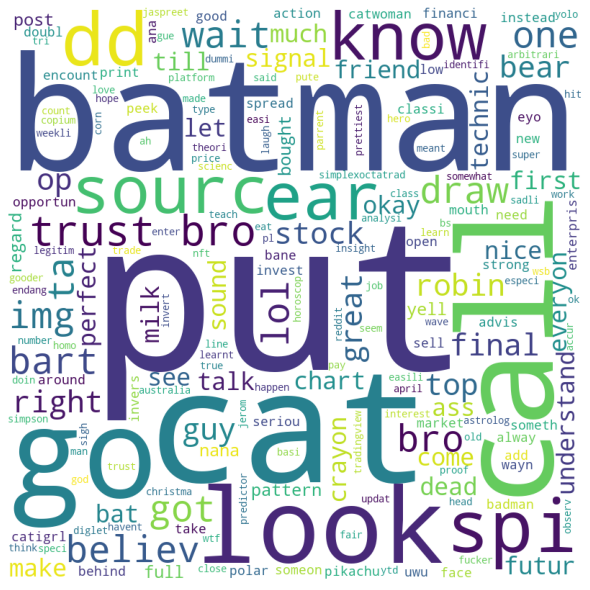

In [24]:
# word cloud for summary  

# put all the tokens into a string 
comment_words = " ".join(all_comment_tokens)

# prepare the wordcloud 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [25]:
# we can create a function for creating word cloud 

def gen_wordcloud(all_tokens):
    words = " ".join(all_tokens)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(words)                     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

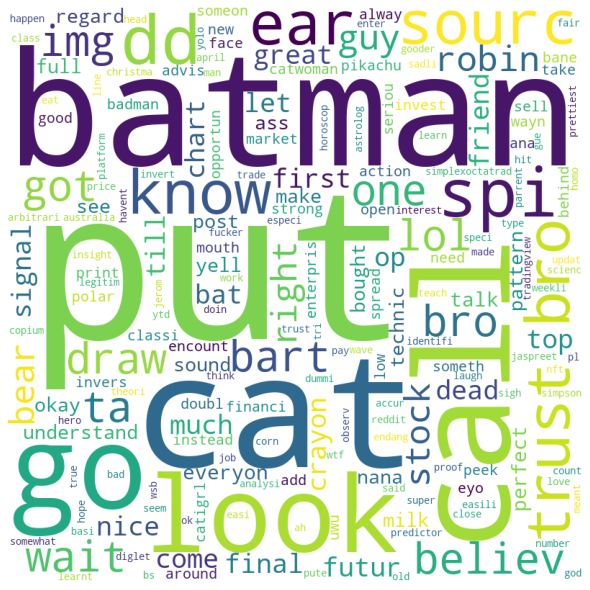

In [26]:
gen_wordcloud(all_comment_tokens)

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [28]:
def gen_sentiment(doc):
    score = sia.polarity_scores(doc)["compound"]
    return score

In [29]:
df['summary_comment_score'] = df["comment"].apply(gen_sentiment)

In [30]:
df.head(10)

,Unnamed: 0,comment,comment_tokens,summary_comment_score
1,1,Could also be the peeking polar bear,"[could, also, peek, polar, bear]",0.0000
2,2,Source: I need my puts to print,"[sourc, need, put, print]",0.0000
3,3,New lows coming…,"[new, low]",-0.2023
4,4,Looks like there was an inverse batman right b...,"[look, like, invers, batman, right]",0.3612
5,5,"I believe this guy, he is into something","[believ, guy, someth]",0.0000
6,6,add a open mouth and you got Pikachu face instead,"[add, open, mouth, got, pikachu, face, instead]",0.0000
7,7,SPY 450 EYO,"[spi, eyo]",0.0000
8,8,The stock market has only been “robin” me,"[stock, market, robin]",0.0000
9,9,"Great DD, Op","[great, dd, op]",0.6249
10,10,"It's not a badman, it's a catigrl UwU","[badman, catigrl, uwu]",0.0000


In [31]:
# Let's check the word cloud of positive/negative text sentiment 
pos_text_df = df[df["summary_comment_score"]>0]
neg_text_df = df[df["summary_comment_score"]<=0]

In [32]:
print(len(pos_text_df))
print(len(neg_text_df))

36
69


In [33]:
sum_score = sum(df["summary_comment_score"])
sum_score

11.8471

In [34]:
# write a function that take dataframe as input, then generate word cloud 

def gen_wordcloud_df(df, token_col):
    
    all_tokens = []
    
    for lst in df[token_col].tolist():
        all_tokens += lst
    
    words = " ".join(all_tokens)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(words)                     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

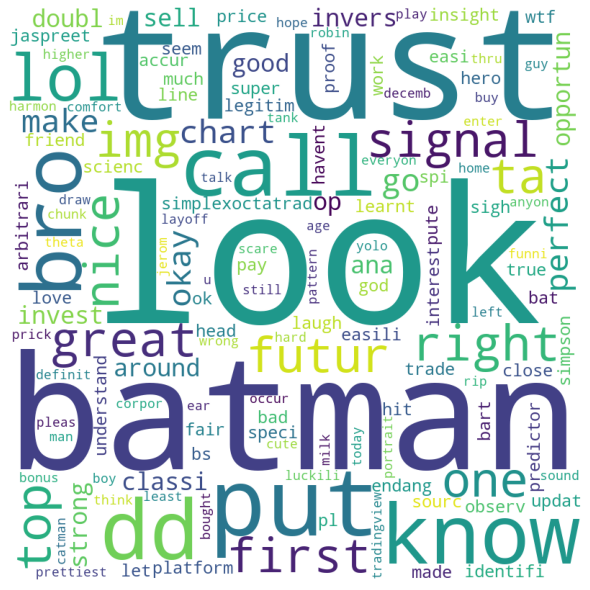

In [35]:
gen_wordcloud_df(pos_text_df, "comment_tokens")

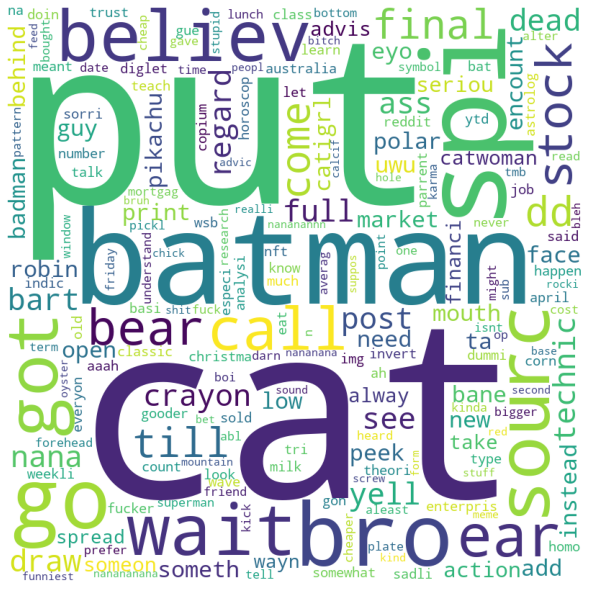

In [36]:
gen_wordcloud_df(neg_text_df, "comment_tokens")